<a href="https://colab.research.google.com/github/darioastu/machineLearning/blob/master/regresion_lineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import csv


In [3]:
datos =pd.read_csv("housing.csv")
datos.describe()

,RM,LSTAT,PTRATIO,MEDV
count,489.000000,489.000000,489.000000,4.890000e+02
mean,6.240288,12.939632,18.516564,4.543429e+05
std,0.643650,7.081990,2.111268,1.653403e+05
min,3.561000,1.980000,12.600000,1.050000e+05
25%,5.880000,7.370000,17.400000,3.507000e+05
50%,6.185000,11.690000,19.100000,4.389000e+05
75%,6.575000,17.120000,20.200000,5.187000e+05
max,8.398000,37.970000,22.000000,1.024800e+06


In [5]:
cda=datos[['RM','MEDV']]
cda.head(9)

,RM,MEDV
0,6.575,504000.0
1,6.421,453600.0
2,7.185,728700.0
3,6.998,701400.0
4,7.147,760200.0
5,6.430,602700.0
6,6.012,480900.0
7,6.172,569100.0
8,5.631,346500.0


In [ ]:
#Graficamos
viz=cda[['RM','MEDV']]
viz.hist()
plt.show()

NameError: ignored

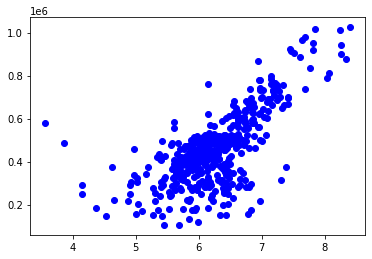

In [26]:
plt.scatter(cda.RM,cda.MEDV,color='blue')
plt=xlabel("numero de habitaciones")
plt=ylabel("Promedio de costo rentavivienda")
plt.shoe()

In [15]:
#20 de valores para el entreno
mask=np.random.rand(len(datos))<0.8
entreno=cda[mask]
test=cda[~mask]

In [17]:
from sklearn import linear_model
regr=linear_model.LinearRegression() 
entre_x=np.asanyarray(entreno[['RM']])
entre_y=np.asanyarray(entreno[['MEDV']])
regr.fit(entre_x,entre_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
#PENDIENTE 
print('Coeficiente pendiente', regr.coef_)
print('b',regr.intercept_)

Coeficiente pendiente [[181372.79525201]]
b [-677323.57035631]


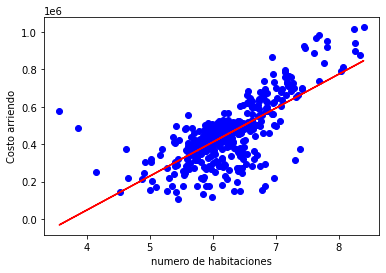

In [25]:
#Linea de ajuste de regresion lineal
plt.scatter(entreno.RM,entreno.MEDV,color="blue")
plt.plot(entre_x,regr.coef_[0][0]*entre_x+regr.intercept_[0],'-r')
plt.xlabel("numero de habitaciones")
plt.ylabel("Costo arriendo")
plt.show()

In [28]:
#Evaluacion del modelo
from sklearn.metrics import r2_score
test_x =np.asanyarray(test[['RM']])
test_y =np.asanyarray(test[['MEDV']])
testeo=regr.predict(test_x)

In [33]:
#Imprimimos
print("Error Cuadratico %.2f" %np.mean(np.absolute(testeo -test_y)))
print("Suma de cuadrados residual %2.f" %np.mean((testeo -test_y) ** 2))
print("R2: %2.f" %r2_score(test_y,testeo))

Error Cuadratico 97234.19
Suma de cuadrados residual 16590754514
R2:  0
